# Implementation of Bag of Words

**Bag of Words:** Bag of Words is a specific text vectorization technique that represents a text document as a bag of its individual words, disregarding word order and context but retaining information about word frequency.

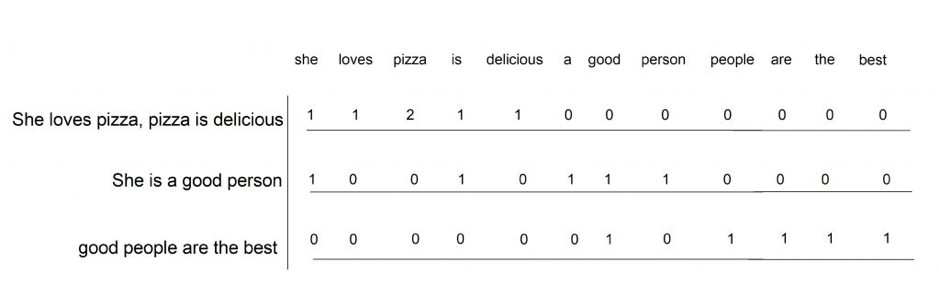

In [2]:
from IPython.display import Image
Image(filename='BOW.png', width=600, height=200)

### Let's work with Reuters Corpus

In [ ]:
import nltk
import pandas as pd

# This will help view all the text
pd.set_option('display.max_colwidth', None)

NLTK provides several datasets for text classification tasks, here are some examples:

1. **Reuters Corpus:** This dataset contains 10,788 news articles from the Reuters news agency, labeled with 90 categories. The dataset is often used for topic classification and information retrieval tasks.<br><br>
2. **20 Newsgroups:** This dataset contains around 20,000 newsgroup posts from 20 different newsgroups, labeled with the newsgroup they belong to. The dataset is often used for text classification tasks, such as topic classification and sentiment analysis.<br><br>
3. **IMDB Reviews:** This dataset contains 50,000 movie reviews from the Internet Movie Database (IMDB), labeled as positive or negative. The dataset is often used for sentiment analysis and text classification tasks.<br><br>
4. **Brown Corpus:** This dataset contains 500 samples of English text from various genres, labeled with categories such as news, fiction, and reviews. The dataset is often used for genre classification and other text classification tasks.<br><br>
5. **Webtext Corpus:** This dataset contains a collection of text extracted from various websites, labeled with categories such as news, blogs, and reviews. The dataset is often used for text classification and language modeling tasks.<br><br>

In [2]:
# Load the Reuters Corpus
nltk.download('reuters')
corpus = nltk.corpus.reuters

[nltk_data] Downloading package reuters to /Users/swapnil/nltk_data...
[nltk_data]   Package reuters is already up-to-date!


In [5]:
# Get the categories and fileids
categories = corpus.categories()
fileids = corpus.fileids()

In [7]:
print(f'The sample corpus has {len(categories)} unique categories and a total of {len(fileids)} articles.')

The sample corpus has 90 unique categories and a total of 10788 articles.


### Let's put this data in a dataframe

In [6]:
# Create a list of dictionaries, where each dictionary represents a document
documents = []
for fileid in fileids:
    category = corpus.categories(fileid)[0]
    raw_text = corpus.raw(fileid)
    documents.append({'fileid': fileid, 'category': category, 'text': raw_text})


# Convert the list of dictionaries to a Pandas DataFrame
df = pd.DataFrame(documents)

In [21]:
df.head()

fileid  category  \
0  test/14826     trade   
1  test/14828     grain   
2  test/14829     crude   
3  test/14832      corn   
4  test/14833  palm-oil   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [7]:
# let's count the number of words in some articles and chose the one with less words for practice
# This code will split the text in the first row by whitespace using the split() method, and then count the number of resulting words using the len() function.
# without the .split() it will count number of characters.

num_words = len(df.loc[1, 'text'].split())
print(num_words)

108


second row has 660 words, we will just use that for now

In [23]:
# use multilist so that you have a dataframe else you will have a series when it is a single row
type(df.loc[[1]])

pandas.core.frame.DataFrame

In [24]:
df= df.loc[[1]]
df.head()

,fileid,category,text
1,test/14828,grain,"CHINA DAILY SAYS VERMIN EAT 7-12 PCT GRAIN STOCKS\n A survey of 19 provinces and seven cities\n showed vermin consume between seven and 12 pct of China's grain\n stocks, the China Daily said.\n It also said that each year 1.575 mln tonnes, or 25 pct, of\n China's fruit output are left to rot, and 2.1 mln tonnes, or up\n to 30 pct, of its vegetables. The paper blamed the waste on\n inadequate storage and bad preservation methods.\n It said the government had launched a national programme to\n reduce waste, calling for improved technology in storage and\n preservation, and greater production of additives. The paper\n gave no further details.\n \n\n"


In [25]:
df['text']

1    CHINA DAILY SAYS VERMIN EAT 7-12 PCT GRAIN STOCKS\n  A survey of 19 provinces and seven cities\n  showed vermin consume between seven and 12 pct of China's grain\n  stocks, the China Daily said.\n      It also said that each year 1.575 mln tonnes, or 25 pct, of\n  China's fruit output are left to rot, and 2.1 mln tonnes, or up\n  to 30 pct, of its vegetables. The paper blamed the waste on\n  inadequate storage and bad preservation methods.\n      It said the government had launched a national programme to\n  reduce waste, calling for improved technology in storage and\n  preservation, and greater production of additives. The paper\n  gave no further details.\n  \n\n
Name: text, dtype: object

In [26]:
# Perform text preprocessing on the words
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')

nltk.download('omw-1.4')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
wordnet_lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/swapnil/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/swapnil/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/swapnil/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [31]:
# create a function to apply pre-processing

def preprocess_text(text):
    
    # Convert the text to lowercase
    text = text.lower()
    
    # Tokenize the text into words
    words = word_tokenize(text)
    
    # Remove stop words and punctuation
    #words = [word for word in words if word.isalpha() and word not in stop_words]
    
    import string

    # Remove punctuations from the tokens
    words = [token for token in words if token not in string.punctuation]


    # Remove stop words from the tokens
    words = [token for token in words if token not in stop_words]


    # Lemmatize the words
    words = [wordnet_lemmatizer.lemmatize(word) for word in words]
    
    # Handle ackronyms
    expanded_terms = {
    'pct': 'percentage',
    'mln':'million'
    }

    words = [expanded_terms.get(word, word) for word in words]
    
    # Convert the list of words back into a string
    preprocessed_text = ' '.join(words)
    
    return preprocessed_text

In [32]:
# apply function on text column
df['clean_text'] = df['text'].apply(preprocess_text)

In [33]:
df.clean_text

1    china daily say vermin eat 7-12 percentage grain stock survey 19 province seven city showed vermin consume seven 12 percentage china 's grain stock china daily said also said year 1.575 million tonne 25 percentage china 's fruit output left rot 2.1 million tonne 30 percentage vegetable paper blamed waste inadequate storage bad preservation method said government launched national programme reduce waste calling improved technology storage preservation greater production additive paper gave detail
Name: text, dtype: object

### We can avoid this, since it is coming from reuters articles
#!pip install autocorrect
import autocorrect

spell = autocorrect.Speller(lang='en')

#tokens = ['This', 'is', 'speling', 'misstake']
corrected_tokens = [spell.autocorrect_word(token) for token in expanded_tokens]print('Corrected tokens:', corrected_tokens)

# Bag of Words

In [37]:
# import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [38]:
# Fit and transform the text
bag_of_words = cv.fit_transform(df['clean_text'])

In [39]:
# the vocabulary is stored in 'cv.vocabulary_'
# sort the keys
vocab = sorted(cv.vocabulary_.keys())

print(vocab)

['12', '19', '25', '30', '575', 'additive', 'also', 'bad', 'blamed', 'calling', 'china', 'city', 'consume', 'daily', 'detail', 'eat', 'fruit', 'gave', 'government', 'grain', 'greater', 'improved', 'inadequate', 'launched', 'left', 'method', 'million', 'national', 'output', 'paper', 'percentage', 'preservation', 'production', 'programme', 'province', 'reduce', 'rot', 'said', 'say', 'seven', 'showed', 'stock', 'storage', 'survey', 'technology', 'tonne', 'vegetable', 'vermin', 'waste', 'year']


#### index starts with 0. '12' has an index 0, '19' has an index 1, and so on.

In [315]:
# to print index and values iterate over the sorted keys and print the key-value pairs
#for key in vocab:
#    print(cv.vocabulary_[key], ':',key )

In [40]:
# print bag of words
print(bag_of_words[0].toarray())

[[2 1 1 1 1 1 1 1 1 1 4 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 2 4 2 1 1 1 1
  1 3 1 2 1 2 2 1 1 2 1 2 2 1]]


#### Because this is a vocab only from one article, the bag of words for that article will not have any zeros.

In [41]:
# Create a bag of words for a sample statement using the same vocabulary
cv.transform(['china capital is beijing']).toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]])

In [42]:
# Convert bag of words to a Pandas DataFrame
bag_of_words_df = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=cv.get_feature_names())

/Users/swapnil/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [43]:
bag_of_words_df

,12,19,25,30,575,additive,also,bad,blamed,calling,...,showed,stock,storage,survey,technology,tonne,vegetable,vermin,waste,year
0,2,1,1,1,1,1,1,1,1,1,...,1,2,2,1,1,2,1,2,2,1


In [44]:
# Add the dataframe to the original dataframe
bag_of_words_df['category'] = 'grain'


In [45]:
# features and target
bag_of_words_df

,12,19,25,30,575,additive,also,bad,blamed,calling,...,stock,storage,survey,technology,tonne,vegetable,vermin,waste,year,category
0,2,1,1,1,1,1,1,1,1,1,...,2,2,1,1,2,1,2,2,1,grain
